In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch


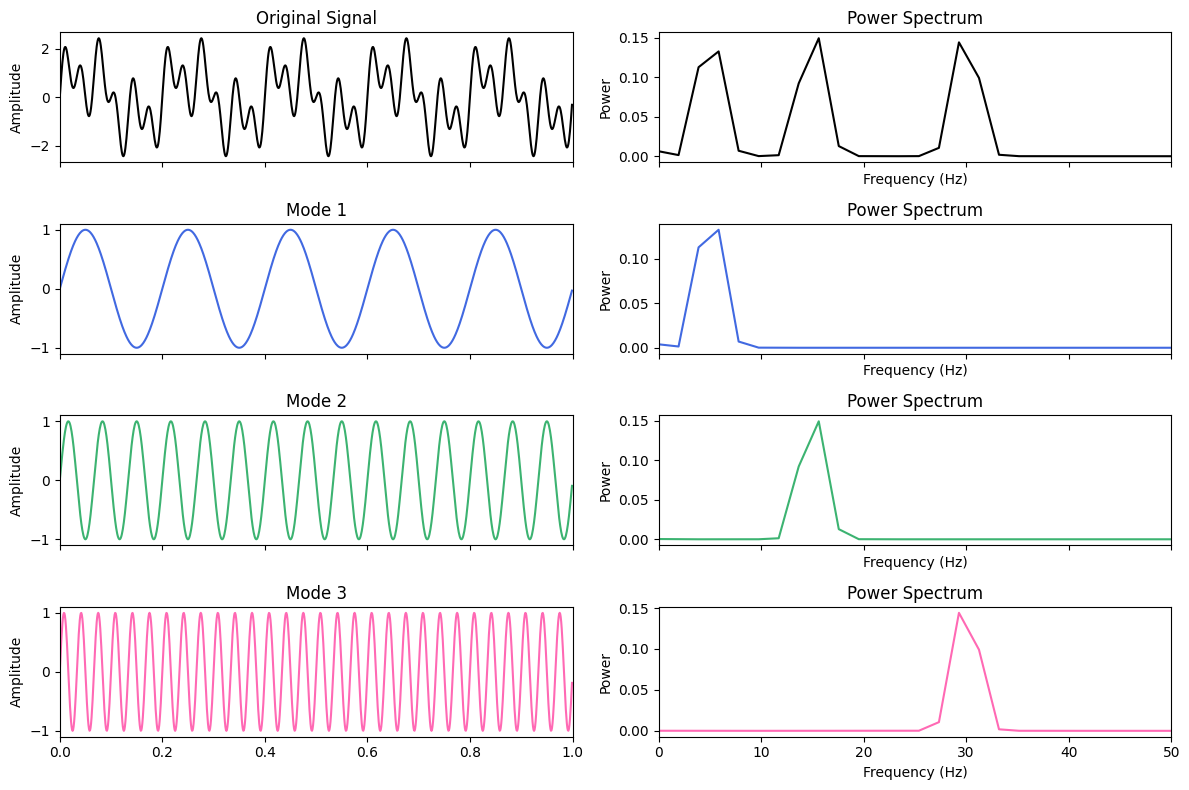

In [ ]:

# === Example signal and modes (replace with real data) ===
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)

# Original signal = 3 frequency components
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)

# Modes: ideally extracted by VMD, EMD, etc.
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# === Create stacked figure with time series + spectrum ===
fig, axs = plt.subplots(len(signals), 2, figsize=(12, 8), sharex="col")

for i, sig in enumerate(signals):
    # Left: time series
    axs[i, 0].plot(t, sig, color=colors[i])
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].set_title(titles[i])
    axs[i, 0].set_xlim(0, 1)

    # Right: Power Spectrum (Welch)
    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[i, 1].plot(freqs, psd, color=colors[i])
    axs[i, 1].set_xlim(0, 50)
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Power")
    axs[i, 1].set_title("Power Spectrum")

plt.tight_layout()
plt.show()


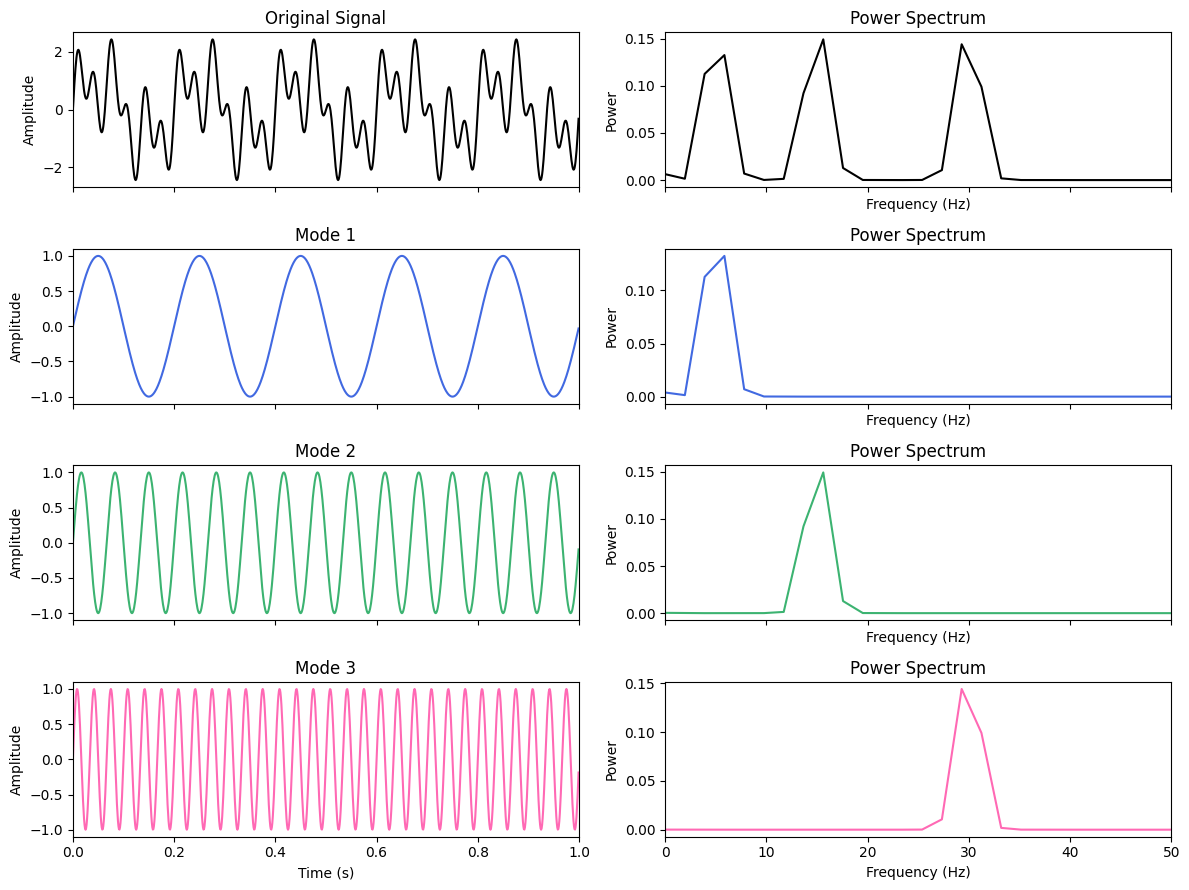

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Simulated data (replace with real signals and modes) ===
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)

signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# === Full stacked figure (time series + spectrum) ===
fig, axs = plt.subplots(4, 2, figsize=(12, 9), sharex="col")

for i, sig in enumerate(signals):
    axs[i, 0].plot(t, sig, color=colors[i])
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].set_title(titles[i])
    axs[i, 0].set_xlim(0, 1)
    if i == 3:
        axs[i, 0].set_xlabel("Time (s)")

    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[i, 1].plot(freqs, psd, color=colors[i])
    axs[i, 1].set_xlim(0, 50)
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Power")
    axs[i, 1].set_title("Power Spectrum")

plt.tight_layout()
plt.savefig("vmd_decomposition_full.png", dpi=300)
plt.show()

# === Save each row with Time label ===
for i, sig in enumerate(signals):
    fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

    axs[0].plot(t, sig, color=colors[i])
    axs[0].set_xlim(0, 1)
    axs[0].set_ylabel("Amplitude")
    axs[0].set_title(titles[i])
    axs[0].set_xlabel("Time (s)")

    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[1].plot(freqs, psd, color=colors[i])
    axs[1].set_xlim(0, 50)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Power")
    axs[1].set_title("Power Spectrum")

    plt.tight_layout()
    plt.savefig(f"vmd_row_{i}.png", dpi=300)
    plt.close()


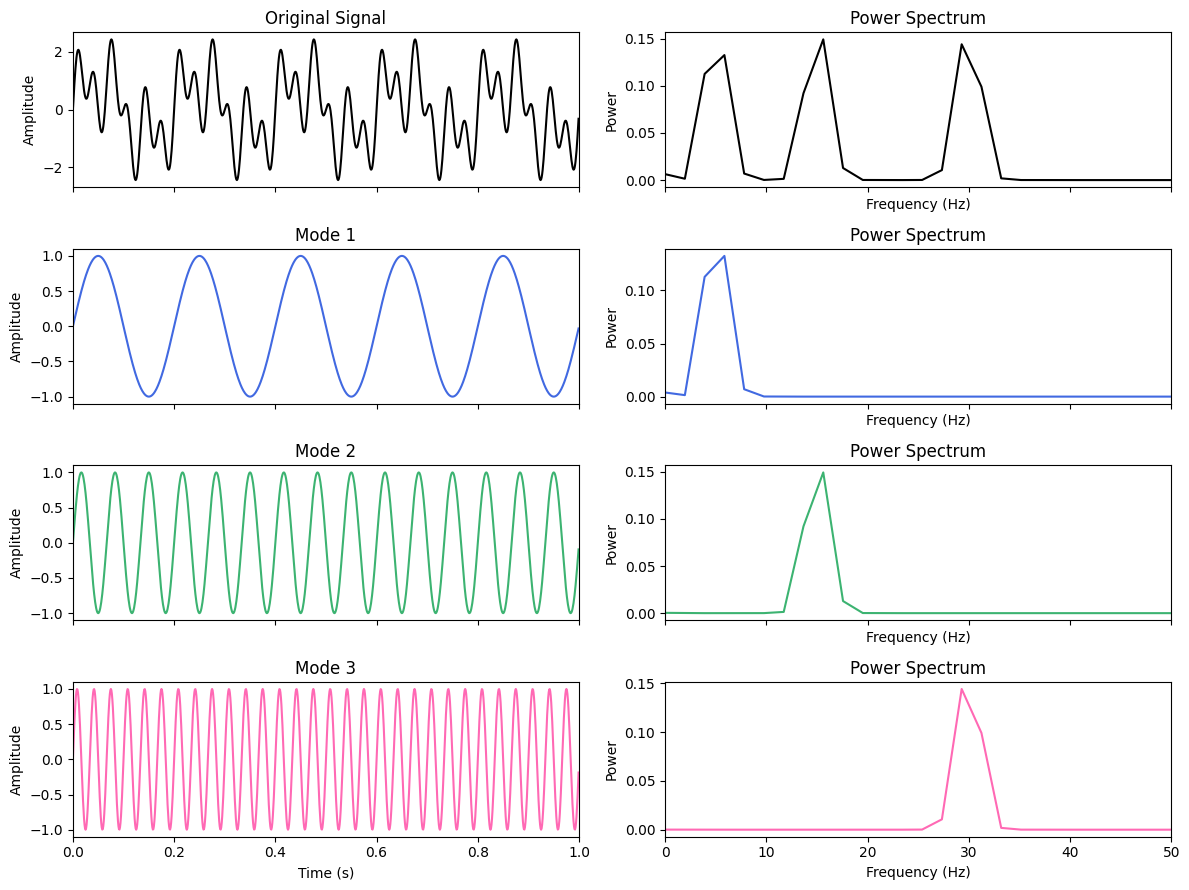

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Simulated data (replace with real signals and modes) ===
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)

# Construct signal and its modes
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# === Save full stacked figure (for overview) ===
fig, axs = plt.subplots(4, 2, figsize=(12, 9), sharex="col")

for i, sig in enumerate(signals):
    # Time domain
    axs[i, 0].plot(t, sig, color=colors[i])
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].set_title(titles[i])
    axs[i, 0].set_xlim(0, 1)
    if i == 3:
        axs[i, 0].set_xlabel("Time (s)")

    # Frequency domain
    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[i, 1].plot(freqs, psd, color=colors[i])
    axs[i, 1].set_xlim(0, 50)
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Power")
    axs[i, 1].set_title("Power Spectrum")

plt.tight_layout()
plt.savefig("vmd_decomposition_full.png", dpi=300)
plt.show()

# === Save each line separately for Beamer slide stacking ===
for i, sig in enumerate(signals):
    fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

    # Time domain
    axs[0].plot(t, sig, color=colors[i])
    axs[0].set_xlim(0, 1)
    axs[0].set_ylabel("Amplitude")
    axs[0].set_title(titles[i])
    axs[0].set_xlabel("Time (s)")

    # Frequency domain
    freqs, psd = welch(sig, fs=fs, nperseg=512)
    axs[1].plot(freqs, psd, color=colors[i])
    axs[1].set_xlim(0, 50)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Power")
    axs[1].set_title("Power Spectrum")

    # Save figure
    plt.tight_layout()
    plt.savefig(f"vmd_row_{i}.png", dpi=300)
    plt.close()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)

signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)
mode1 = np.sin(2 * np.pi * 5 * t)
mode2 = np.sin(2 * np.pi * 15 * t)
mode3 = np.sin(2 * np.pi * 30 * t)

signals = [signal, mode1, mode2, mode3]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "mediumseagreen", "hotpink"]

# Generate stacked figures progressively
for frame in range(1, 5):  # Number of rows to show (1 to 4)
    fig, axs = plt.subplots(frame, 2, figsize=(12, 2.5 * frame), sharex="col")
    if frame == 1:
        axs = np.array([axs])  # make 2D

    for i in range(frame):
        sig = signals[i]
        axs[i, 0].plot(t, sig, color=colors[i])
        axs[i, 0].set_xlim(0, 1)
        axs[i, 0].set_ylabel("Amplitude")
        axs[i, 0].set_title(titles[i])
        axs[i, 0].set_xlabel("Time (s)")

        freqs, psd = welch(sig, fs=fs, nperseg=512)
        axs[i, 1].plot(freqs, psd, color=colors[i])
        axs[i, 1].set_xlim(0, 50)
        axs[i, 1].set_xlabel("Frequency (Hz)")
        axs[i, 1].set_ylabel("Power")
        axs[i, 1].set_title("Power Spectrum")

    plt.tight_layout()
    plt.savefig(f"vmd_stack_{frame - 1}.png", dpi=300)
    plt.close()


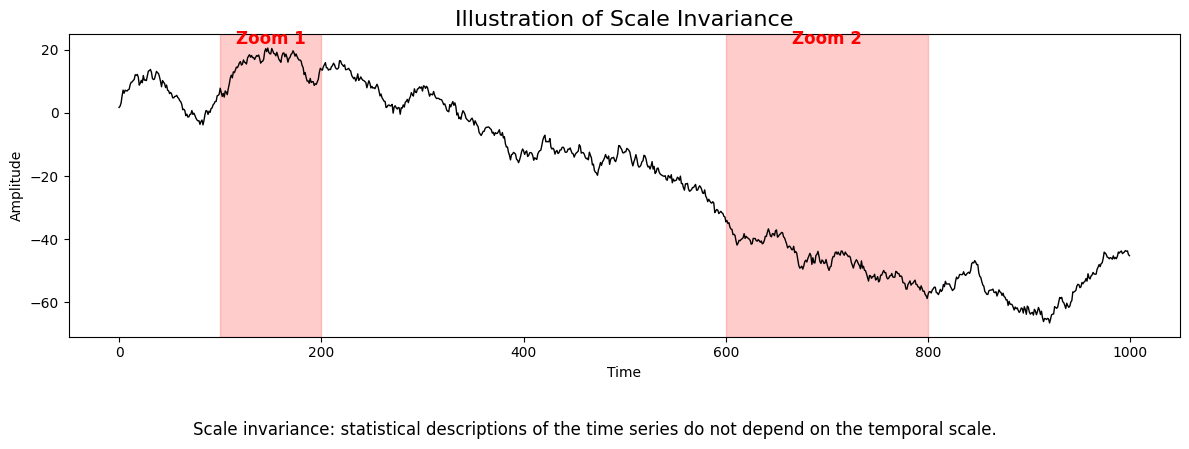

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate scale-invariant-like signal (e.g., fractional Gaussian noise-like)
np.random.seed(0)
N = 1000
signal = np.cumsum(np.random.randn(N))  # random walk is a self-similar process

# Define zoom windows
zoom1 = (100, 200)
zoom2 = (600, 800)

# Plot full signal with zoom boxes
plt.figure(figsize=(12, 4))
plt.plot(signal, color='black', linewidth=1)
plt.title("Illustration of Scale Invariance", fontsize=16)

# Draw red rectangles to indicate zooms
for (start, end), label in zip([zoom1, zoom2], ['Zoom 1', 'Zoom 2']):
    plt.axvspan(start, end, color='red', alpha=0.2)
    mid = (start + end) // 2
    plt.text(mid, max(signal), label, color='red', ha='center', va='bottom', fontsize=12, weight='bold')

# Add explanation text
plt.figtext(0.5, -0.1, "Scale invariance: statistical descriptions of the time series do not depend on the temporal scale.",
            ha='center', fontsize=12)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [17]:
from PIL import Image, ImageDraw

# Load base image
img = Image.open("meg_projection_cortex.png")
frames = []

# Coordinates for each cortical region (approx manually)
positions = [(300, 200), (350, 250), (450, 500)]  # example

for i, pos in enumerate(positions):
    frame = img.copy()
    draw = ImageDraw.Draw(frame)
    draw.ellipse((pos[0]-10, pos[1]-10, pos[0]+10, pos[1]+10), fill='blue')
    #draw.text((pos[0]+15, pos[1]), fill='black')
    frames.append(frame)

# Save animated GIF
frames[0].save("cortical_path.gif", save_all=True, append_images=frames[1:], duration=1000, loop=0)


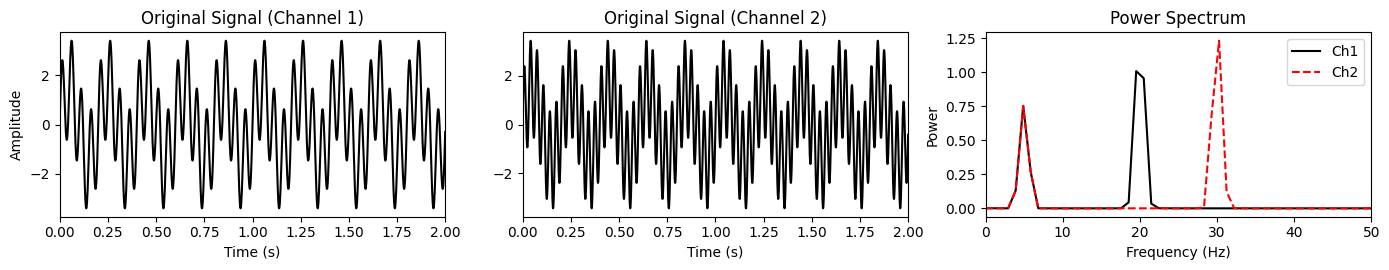

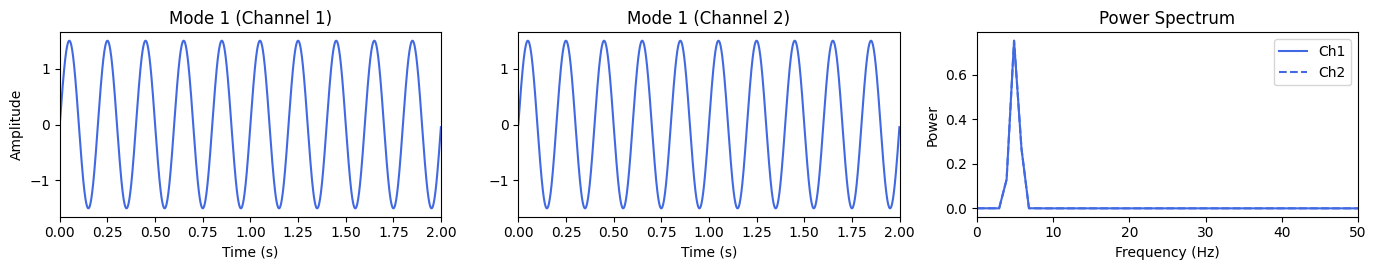

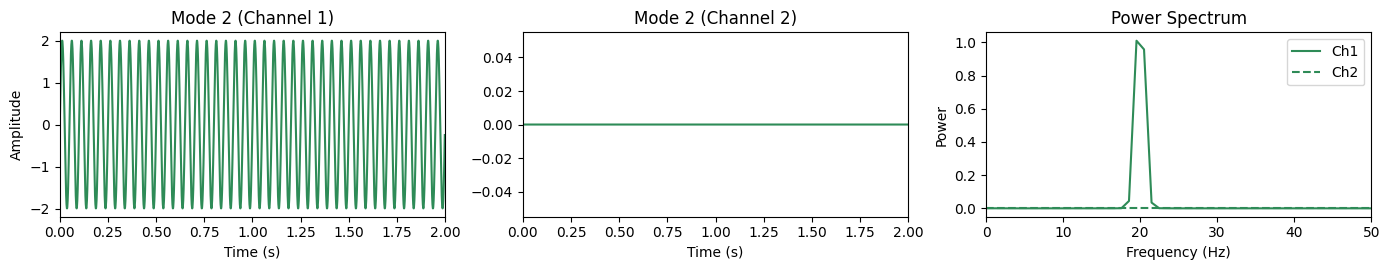

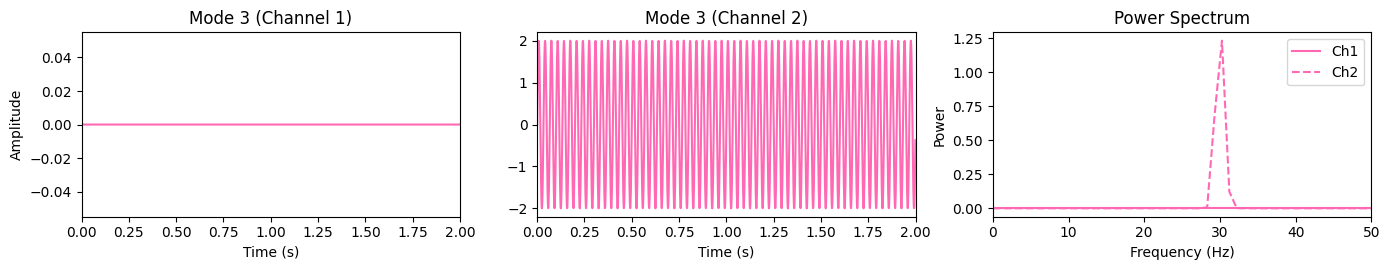

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Parameters ===
fs = 1000  # Sampling frequency
duration = 2.0  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# === Strong Modes ===
mode1_ch1 = 1.5 * np.sin(2 * np.pi * 5 * t)     # Shared 5 Hz
mode1_ch2 = 1.5 * np.sin(2 * np.pi * 5 * t)

mode2_ch1 = 2.0 * np.sin(2 * np.pi * 20 * t)    # Ch1 only
mode2_ch2 = np.zeros_like(t)

mode3_ch1 = np.zeros_like(t)
mode3_ch2 = 2.0 * np.sin(2 * np.pi * 30 * t)    # Ch2 only

# === Original signal = sum of modes ===
signal_ch1 = mode1_ch1 + mode2_ch1
signal_ch2 = mode1_ch2 + mode3_ch2

# === Pack signals ===
signals_ch1 = [signal_ch1, mode1_ch1, mode2_ch1, mode3_ch1]
signals_ch2 = [signal_ch2, mode1_ch2, mode2_ch2, mode3_ch2]
titles = ["Original Signal", "Mode 1", "Mode 2", "Mode 3"]
colors = ["black", "royalblue", "seagreen", "hotpink"]

# === Save each row individually ===
for i in range(4):
    fig, axs = plt.subplots(1, 3, figsize=(14, 2.8))

    # Time: Ch1
    axs[0].plot(t, signals_ch1[i], color=colors[i])
    axs[0].set_title(f"{titles[i]} (Channel 1)")
    axs[0].set_xlim(0, duration)
    axs[0].set_ylabel("Amplitude")
    axs[0].set_xlabel("Time (s)")

    # Time: Ch2
    axs[1].plot(t, signals_ch2[i], color=colors[i])
    axs[1].set_title(f"{titles[i]} (Channel 2)")
    axs[1].set_xlim(0, duration)
    axs[1].set_xlabel("Time (s)")

    # Spectrum
    freqs1, psd1 = welch(signals_ch1[i], fs=fs, nperseg=1024)
    freqs2, psd2 = welch(signals_ch2[i], fs=fs, nperseg=1024)

    axs[2].plot(freqs1, psd1, color=colors[i], label="Ch1")
    if i == 0:
        axs[2].plot(freqs2, psd2, color="red", linestyle='--', label="Ch2")
    else:
        axs[2].plot(freqs2, psd2, color=colors[i], linestyle='--', label="Ch2")

    axs[2].set_xlim(0, 50)
    axs[2].set_title("Power Spectrum")
    axs[2].legend()
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Power")

    plt.tight_layout()
    plt.savefig(f"mvmd_row_{i}.png", dpi=300)


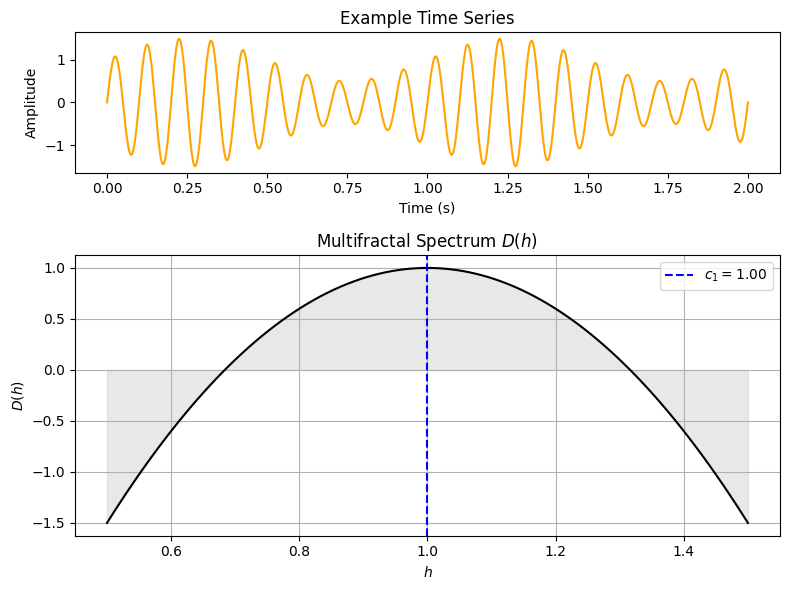

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# === Example data (replace with your own)
h = np.linspace(0.5, 1.5, 100)
D = 1 - ((h - 1)**2) / 0.1  # Fake multifractal spectrum (parabola)
c1 = 1.0
c2 = -0.05

# Simulated time series (replace with real one)
time = np.linspace(0, 2, 1000)
signal = np.sin(2 * np.pi * 10 * time) * (1 + 0.5 * np.sin(2 * np.pi * 1 * time))  # AM signal

# === Create stacked plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})

# --- Top subplot: Time series ---
axs[0].plot(time, signal, color='orange')
axs[0].set_title("Example Time Series")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")

# --- Bottom subplot: Multifractal spectrum ---
axs[1].plot(h, D, color='black')
axs[1].axvline(x=c1, color='blue', linestyle='--', label=f'$c_1 = {c1:.2f}$')
axs[1].fill_between(h, D, color='lightgray', alpha=0.5)
axs[1].set_title("Multifractal Spectrum $D(h)$")
axs[1].set_xlabel("$h$")
axs[1].set_ylabel("$D(h)$")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


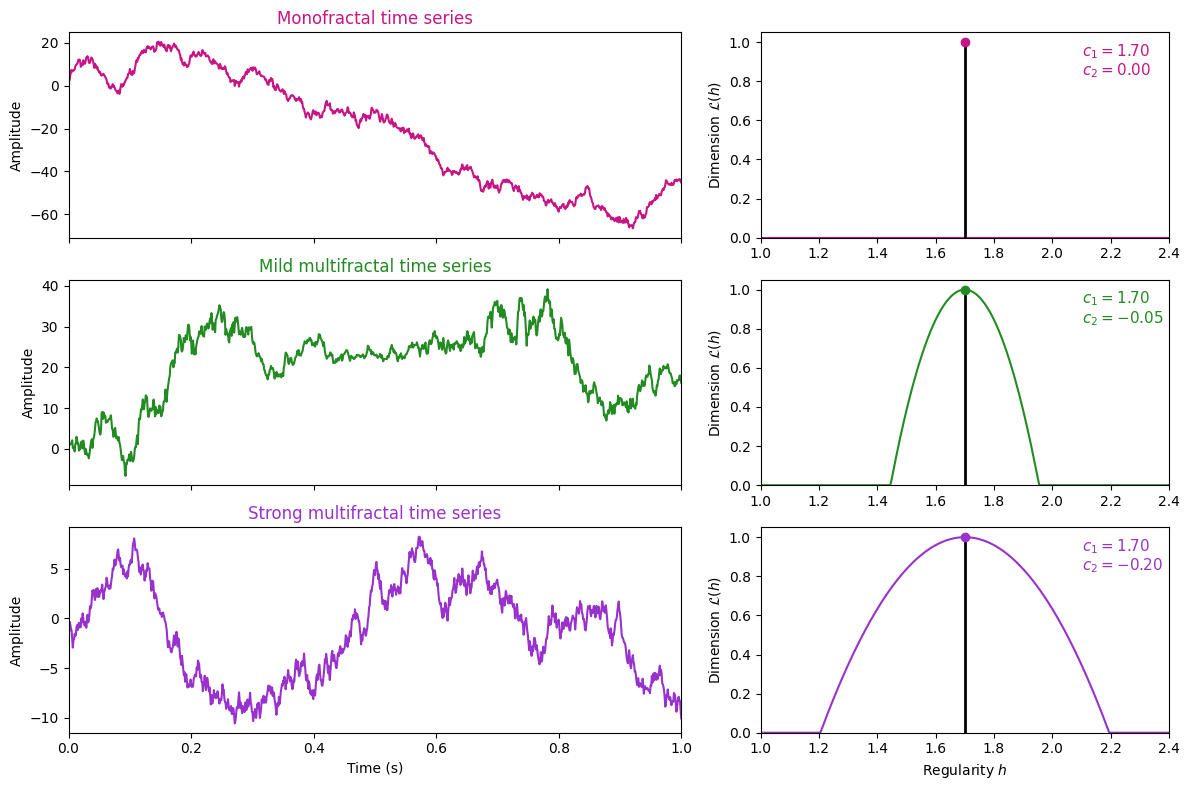

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# --- Generate synthetic time series ---
np.random.seed(0)
N = 1000
mono = np.cumsum(np.random.randn(N))  # monofractal-like
mild = np.cumsum(np.random.randn(N) * (1 + 0.5 * np.sin(np.linspace(0, 10, N))))  # mild multifractal
strong = np.cumsum(np.sign(np.random.randn(N)) * np.random.rand(N))  # strong multifractal

# --- Generate synthetic multifractal spectra ---
h = np.linspace(1.0, 2.4, 300)
def multifractal_spectrum(h, h0, width):
    return np.maximum(1 - ((h - h0) ** 2) / (2 * width**2), 0)

L1 = multifractal_spectrum(h, 1.7, 0.0001)  # monofractal
L2 = multifractal_spectrum(h, 1.7, 0.18)   # mild
L3 = multifractal_spectrum(h, 1.7, 0.35)   # strong

# --- Plot settings ---
colors = ['#C71585', '#228B22', '#9932CC']
series = [mono, mild, strong]
spectra = [L1, L2, L3]
titles = ['Monofractal time series', 'Mild multifractal time series', 'Strong multifractal time series']
c2_vals = [0.00, -0.05, -0.20]

fig, axs = plt.subplots(3, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1.5, 1]})
for i in range(3):
    # Time series
    axs[i, 0].plot(np.linspace(0, 1, N), series[i], color=colors[i])
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].set_title(titles[i], fontsize=12, color=colors[i])
    axs[i, 0].set_xlim(0, 1)
    if i != 2:
        axs[i, 0].set_xticklabels([])

    # Spectrum
    axs[i, 1].plot(h, spectra[i], color=colors[i])
    #axs[i, 1].axvline(x=1.7, color='black', linewidth=1.5)
    axs[i, 1].axvline(x=1.7, ymin=0.0, ymax=0.95, color='black', linewidth=2)

    axs[i, 1].scatter([1.7], [1.0], color=colors[i], zorder=5)

    # Add c1 and c2 text on top right
    axs[i, 1].text(2.1, 0.93, r"$c_1 = 1.70$", color=colors[i], fontsize=11)
    axs[i, 1].text(2.1, 0.83, rf"$c_2 = {c2_vals[i]:.2f}$", color=colors[i], fontsize=11)

    axs[i, 1].set_xlim(1.0, 2.4)
    axs[i, 1].set_ylim(0, 1.05)
    axs[i, 1].set_ylabel(r"Dimension $\mathcal{L}(h)$")


axs[2, 1].set_xlabel(r"Regularity $h$")
axs[2, 0].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


In [4]:
import mne 


def load_signal(path):
    raw = mne.io.read_raw_fif(path, preload=True)
    raw_meg = raw.copy().pick('meg')
    data = raw_meg.get_data(return_times=False)
    return raw_meg, data

raw, data_matrix = load_signal("../data/sub-01_ses-01_task-rest_proc-filt_raw.fif")

Opening raw data file ../data/sub-01_ses-01_task-rest_proc-filt_raw.fif...
    Range : 34500 ... 116999 =    138.000 ...   467.996 secs
Ready.
Reading 0 ... 82499  =      0.000 ...   329.996 secs...


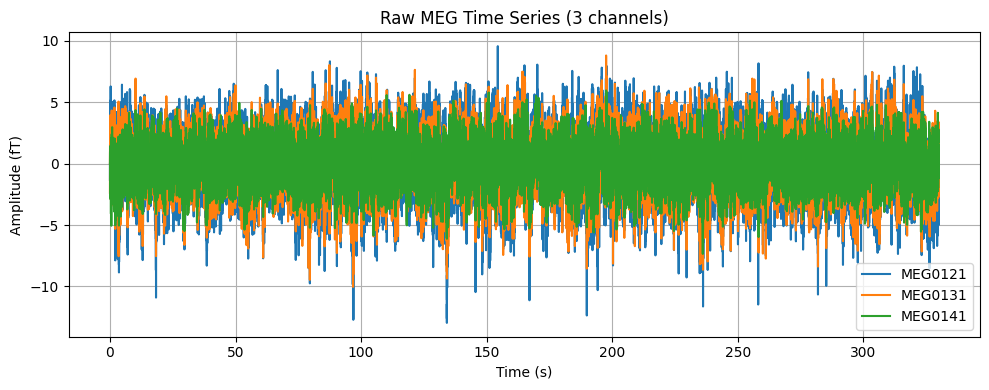

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Pick your 3 channels
selected_chs = ['MEG0121', 'MEG0131', 'MEG0141']
picks = mne.pick_channels(raw.info['ch_names'], include=selected_chs)

# Get data
data, times = raw.get_data(picks=picks, return_times=True)

# Plot
plt.figure(figsize=(10, 4))
for i, ch_name in enumerate(selected_chs):
    plt.plot(times, data[i] * 1e13, label=ch_name)  # scale to fT
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (fT)")
plt.title("Raw MEG Time Series (3 channels)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


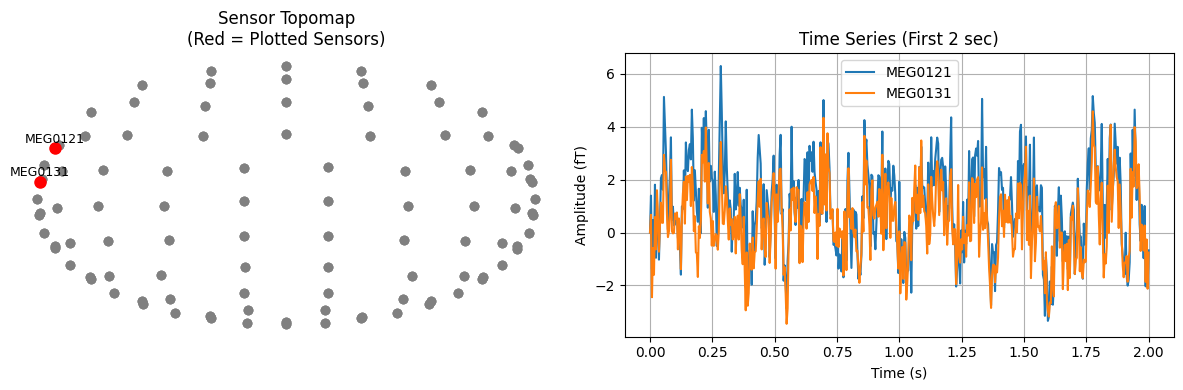

In [7]:
import mne
import matplotlib.pyplot as plt
import numpy as np

# Crop to 2 seconds max
raw.crop(tmax=2)

# Choose 3 known-valid MEG sensor names
selected_chs = ['MEG0121', 'MEG0131']
selected_picks = mne.pick_channels(raw.info['ch_names'], include=selected_chs)

# Get data and times for these channels
data, times = raw.get_data(picks=selected_picks, return_times=True)

# --------- Get sensor positions using public API ---------
# Get all MEG sensors
meg_picks = mne.pick_types(raw.info, meg=True)
ch_pos_dict = {raw.ch_names[i]: raw.info['chs'][i]['loc'][:100] for i in meg_picks}

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# --------- Left plot: Topomap ---------
for ch_name, pos in ch_pos_dict.items():
    axs[0].plot(pos[0], pos[1], 'o', color='gray', markersize=6)

# Highlight selected channels
for ch_name in selected_chs:
    if ch_name in ch_pos_dict:
        pos = ch_pos_dict[ch_name]
        axs[0].plot(pos[0], pos[1], 'ro', markersize=8)
        axs[0].text(pos[0], pos[1] + 0.005, ch_name, ha='center', fontsize=9)
    else:
        print(f"Warning: {ch_name} not found in ch_pos_dict")

axs[0].set_title("Sensor Topomap\n(Red = Plotted Sensors)")
axs[0].axis('off')

# --------- Right plot: Time series ---------
for i, ch_data in enumerate(data):
    axs[1].plot(times, ch_data * 1e13 , label=selected_chs[i])  # offset and scale for readability

axs[1].set_title("Time Series (First 2 sec)")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude (fT)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD  # install with: pip install vmdpy

# Simulate 2 example signals (Sensor 1 and Sensor 2)
fs = 500
T = 1
t = np.linspace(0, T, T * fs, endpoint=False)

# Sensor 1: mixed sinusoids
signal1 = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 30 * t)
# Sensor 2: more noise
signal2 = np.sin(2 * np.pi * 20 * t) + 0.5 * np.random.randn(len(t))

# VMD parameters
alpha = 2000       # bandwidth constraint
tau = 0.            # noise-tolerance (no constraint)
K = 5              # number of modes
DC = 0             # no DC mode
init = 1           # initialize omegas uniformly
tol = 1e-7

# Run VMD on both signals
u1, _, _ = VMD(signal1, alpha, tau, K, DC, init, tol)
u2, _, _ = VMD(signal2, alpha, tau, K, DC, init, tol)

# === PLOT FOR SENSOR 1 ===
plt.figure(figsize=(6, 2))
plt.plot(t, signal1, label="Sensor 1 Signal", color='black')
plt.title("Sensor 1: Input Signal")
plt.tight_layout()
plt.savefig("sensor1_input.png", dpi=300)
plt.close()

plt.figure(figsize=(6, 6))
for k in range(K):
    plt.subplot(K, 1, k + 1)
    plt.plot(t, u1[k, :])
    plt.ylabel(f"Mode {k+1}")
    if k == 0:
        plt.title("Sensor 1: VMD Modes")
plt.tight_layout()
plt.savefig("sensor1_modes.png", dpi=300)
plt.close()

# === PLOT FOR SENSOR 2 ===
plt.figure(figsize=(6, 2))
plt.plot(t, signal2, label="Sensor 2 Signal", color='black')
plt.title("Sensor 2: Input Signal")
plt.tight_layout()
plt.savefig("sensor2_input.png", dpi=300)
plt.close()

plt.figure(figsize=(6, 6))
for k in range(K):
    plt.subplot(K, 1, k + 1)
    plt.plot(t, u2[k, :])
    plt.ylabel(f"Mode {k+1}")
    if k == 0:
        plt.title("Sensor 2: VMD Modes")
plt.tight_layout()
plt.savefig("sensor2_modes.png", dpi=300)
plt.close()


Opening raw data file ../data/sub-01_ses-01_task-rest_proc-filt_raw.fif...
    Range : 34500 ... 116999 =    138.000 ...   467.996 secs
Ready.
Reading 0 ... 82499  =      0.000 ...   329.996 secs...


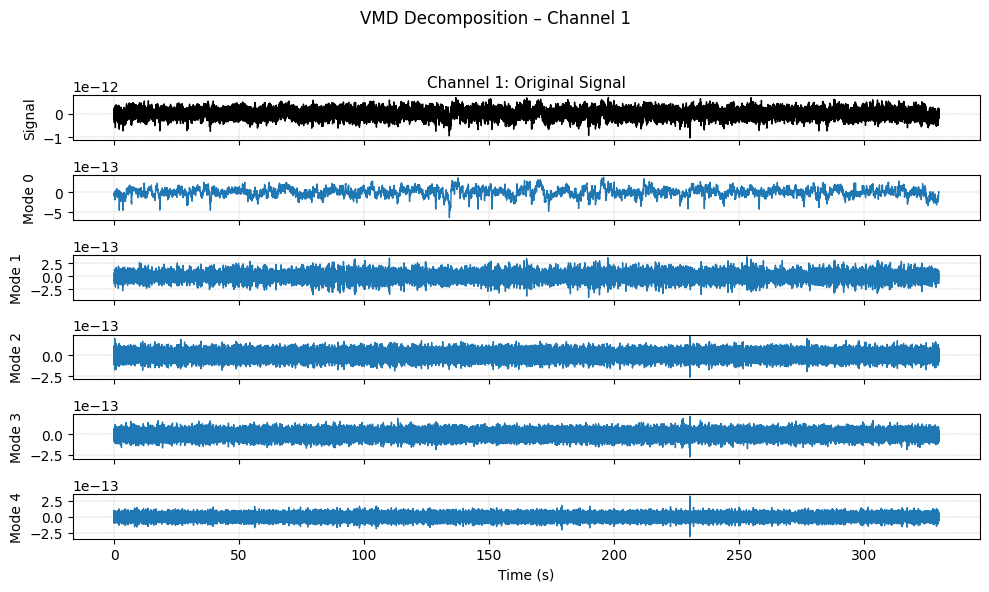

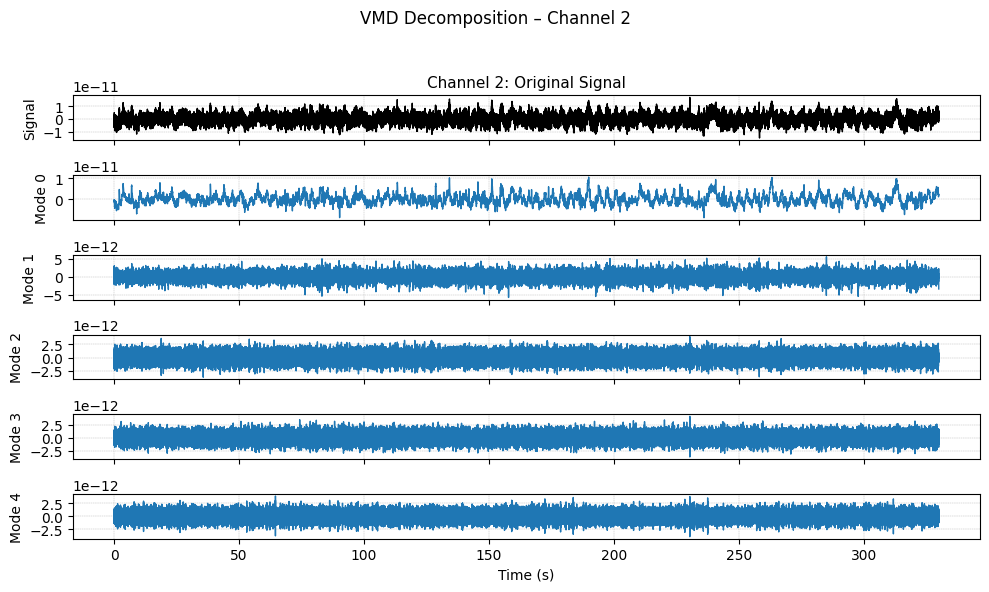

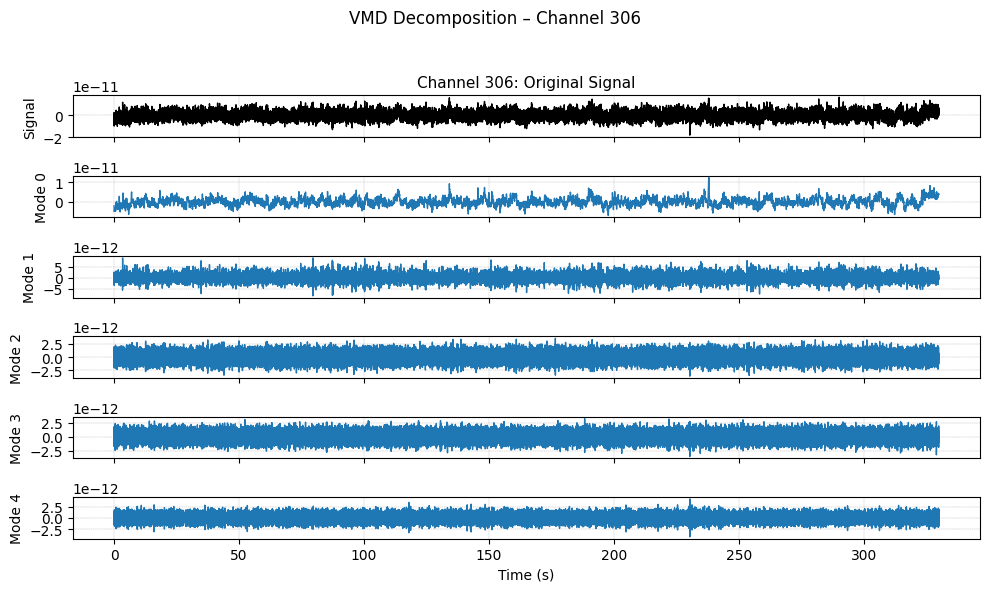

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# === Load MEG raw file ===
def load_signal(path):
    raw = mne.io.read_raw_fif(path, preload=True)
    raw_meg = raw.copy().pick('meg')
    data = raw_meg.get_data(return_times=False)
    times = raw_meg.times
    return raw_meg, data, times

# === Load MEG data ===
raw, data_matrix, times = load_signal("../data/sub-01_ses-01_task-rest_proc-filt_raw.fif")

# === Parameters ===
channel_indices = [0, 1, 2]
channel_labels = ['Channel 1', 'Channel 2', 'Channel 306']
base_path = "../results/real"

# === Loop over each channel ===
for idx, ch_idx in enumerate(channel_indices):
    # Load original signal
    signal = data_matrix[ch_idx]

    # Load modes (shape: n_modes x n_samples)
    mode_file = f"{base_path}/meg_channel_{ch_idx}/VMD/modes/meg_channel_{ch_idx}_modes.npy"
    all_modes = np.load(mode_file)
    n_modes = all_modes.shape[0]

    # === Create subplot: original + modes ===
    fig, axs = plt.subplots(n_modes + 1, 1, figsize=(10, 6), sharex=True)

    # Plot original signal
    axs[0].plot(times, signal, color='black', linewidth=1)
    axs[0].set_ylabel("Signal")
    axs[0].set_title(f"{channel_labels[idx]}: Original Signal", fontsize=11)
    axs[0].grid(True, linestyle='--', linewidth=0.3)

    # Plot each mode
    for k in range(n_modes):
        axs[k + 1].plot(times, all_modes[k], linewidth=1)
        axs[k + 1].set_ylabel(f"Mode {k}")
        axs[k + 1].grid(True, linestyle='--', linewidth=0.3)

    axs[-1].set_xlabel("Time (s)")
    plt.suptitle(f"VMD Decomposition – {channel_labels[idx]}", fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save and show
    fig_path = f"decomposition_{channel_labels[idx].replace(' ', '_')}.png"
    plt.savefig(fig_path, dpi=300)
    plt.show()


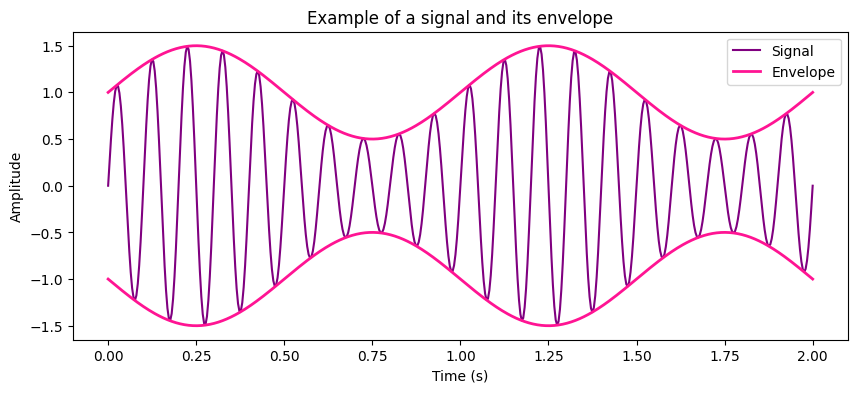

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple oscillatory signal (10 Hz carrier modulated by 1 Hz envelope)
fs = 250
t = np.linspace(0, 2, fs*2)  # 2 seconds
carrier = np.sin(2 * np.pi * 10 * t)  # 10 Hz
modulator = 1 + 0.5 * np.sin(2 * np.pi * 1 * t)  # 1 Hz modulation
signal = modulator * carrier
envelope = np.abs(modulator)

plt.figure(figsize=(10,4))
plt.plot(t, signal, label="Signal", color="purple")
plt.plot(t, envelope, label="Envelope", color="deeppink", linewidth=2)
plt.plot(t, -envelope, color="deeppink", linewidth=2)
plt.title("Example of a signal and its envelope", fontsize=12)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
